Lettura dati da dataset annuali

In [2]:
# import pandas
import pandas as pd

# read all datasets
files = [
    '../graph/nodes/EstrazioniTamponi_clean_full.csv',
]

data = pd.concat([pd.read_csv(f, skipinitialspace=True) for f in files])
len = len(data)
print("records: ", len)


records:  690153


In [3]:
# picchi pandemici - NO FILTER
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

picchi_pandemici = [
    '2020-04-25',
    '2020-10-15',
    '2021-03-08',
    '2022-01-10',
]


In [6]:
# filtra colonne: Codice Reparto,Nome Reparto,Conteggio.
nodes_data = data[['Codice Reparto', 'Nome Reparto', 'Conteggio']]

# group by Codice Reparto, Nome Reparto.
# Somma per Conteggio.
nodes_data = nodes_data.groupby(['Codice Reparto', 'Nome Reparto']).sum()

# Ordina per Conteggio.
nodes_data = nodes_data.sort_values(by='Conteggio', ascending=False)

print(nodes_data)

                                                   Conteggio
Codice Reparto Nome Reparto                                 
46720          CHIERI - Osp. Maggiore                  90483
20193          RM DEA                                  76582
10001          MOL PS Medicina                         40091
10044          MOL 01-OBI EMERGENZA                    35964
20176          SA Pronto Soccorso                      30168
...                                                      ...
11427          MOL Onc Med 1 SDA Pre terapia COES          1
11428          MOL Endocrinologia Onc SDA CO               1
11451          MOL Coord.Ass.Psichiatrico Os               1
11463          MOL Chir Gen Urg e PS 3 NOIMP               1
10000          MOL PEIMAF Molinette                        1

[708 rows x 1 columns]


In [10]:
out_file = '../graph/nodes/nodes_full_orig.csv'

nodes_data.to_csv(out_file, index=True, header=True)

In [4]:
# import pandas
import pandas as pd

# leggi file
in_file = '../graph/nodes/nodes_full_edit.xlsx'

nodes_data = pd.read_excel(in_file)
nodes_data

edited_nodes_data = nodes_data

# crea nuova colonna Codice Finale 
# Se Correzione codice non è NaN, Codice Finale è uguale a Correzione codice, sennò è uguale a Codice Reparto
edited_nodes_data['Codice Finale'] = edited_nodes_data['Correzione codice'].fillna(edited_nodes_data['Codice Reparto'])
edited_nodes_data['Nome Finale'] = edited_nodes_data['Correzione nome'].fillna(edited_nodes_data['Nome Reparto'])

# mantieni solo le colonne:
# Codice Finale, Nome Finale, Conteggio, Interno/Esterno
edited_nodes_data = edited_nodes_data[['Codice Finale', 'Nome Finale', 'Conteggio', 'Interno/Esterno']]

edited_nodes_data = edited_nodes_data.groupby(['Codice Finale', 'Nome Finale', 'Interno/Esterno']).sum()

edited_nodes_data = edited_nodes_data.sort_values(by='Conteggio', ascending=False)

edited_nodes_data

,,,Conteggio
Codice Finale,Nome Finale,Interno/Esterno,
46720,CHIERI - Osp. Maggiore,Esterno,90483
20193,RM DEA,Esterno,76582
10001,MOL PS Medicina,Interno,40091
10044,MOL 01-OBI EMERGENZA,Interno,35964
20176,SA Pronto Soccorso,Esterno,30168
...,...,...,...
10496,MOL ORL 2 U Amb,Interno,1
10558,MOL Dermatologia chirurgica DH,Interno,1
10572,MOL Dermo U Amb allergologia,Interno,1


In [58]:
interni_data = edited_nodes_data.loc[edited_nodes_data.index.get_level_values('Interno/Esterno') == 'Interno']

# sort by count
interni_data = interni_data.sort_values(by='Conteggio', ascending=False)
print(interni_data)

# average and variance
print(interni_data['Conteggio'].mean(), interni_data['Conteggio'].var())

# filtra la coda dei dati con minore Conteggio (mantieni 90% dei dati, aggrega il resto in 'altro')
# ???

                                                                 Conteggio
Codice Finale Nome Finale                       Interno/Esterno           
10001         MOL PS Medicina                   Interno              40091
10044         MOL 01-OBI EMERGENZA              Interno              35964
10003         MOL PS Chirurgia ospedaliera      Interno               8217
10014         MOL PS Chirurgia Univ             Interno               6890
10372         MOL Chir Gen 1 U Deg 2p           Interno               6799
...                                                                    ...
10138         MOL Week Hosp Neurochir Deg 0401B Interno                  1
10158         MOL Neurochirurgia DH             Interno                  1
10064         MOL 6903 - Radiologia 3 - Amb     Interno                  1
10159         MOL Radioterapia U DH             Interno                  1
10000         MOL PEIMAF Molinette              Interno                  1

[241 rows x 1 columns]
1

C:\Users\Arbiter\AppData\Local\Temp\ipykernel_14560\3172779559.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(plot_data.index.get_level_values('Nome Finale'), rotation=90)


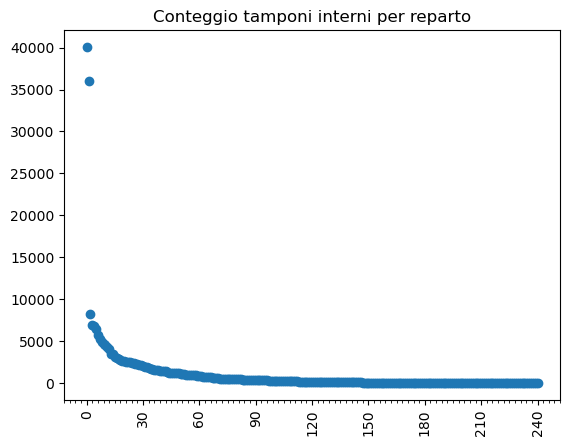

In [59]:
# plot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plot_data = interni_data
fig, ax = plt.subplots()
ax.plot(plot_data.index.get_level_values('Nome Finale'), plot_data['Conteggio'], 'o')
ax.set_xticklabels(plot_data.index.get_level_values('Nome Finale'), rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.xaxis.set_minor_locator(plt.MaxNLocator(100))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
ax.set_title('Conteggio tamponi interni per reparto')
plt.show()
